In [30]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np

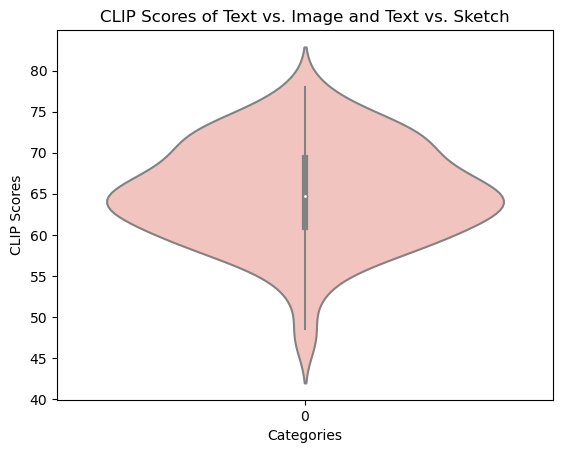

In [45]:
df = pd.read_csv("clip_scores/clip_scores_actual.csv")
df *= 100
ax = seaborn.violinplot(df, inner="box", palette=['#FBBDB7', '#C7DBF5'])
ax.set(xlabel='Categories', ylabel='CLIP Scores')
plt.title("CLIP Scores of Text vs. Image and Text vs. Sketch")
pal = seaborn.color_palette('Reds', 5)
pal.as_hex()
plt.show()

In [39]:
df

,Unnamed: 0,0,1
0,Page-557,24.991013,27.017161
1,Page-1009,30.206516,31.760316
2,Page-937,26.365149,32.888520
3,Page-1066,22.928698,25.393576
4,Page-1032,25.841707,30.331509
...,...,...,...
309,Page-1100,22.321367,18.749577
310,Page-953,22.735674,24.693436
311,Page-1118,30.345015,29.887009
312,Page-1004,31.258150,30.460261


In [43]:
df.median()

/tmp/ipykernel_147644/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


0    25.498158
1    28.267439
dtype: float64

In [9]:
found_row2["CLIP"].iloc[0]

66.064453125

In [18]:

clip_score_act = pd.read_csv("clip_scores/clip_scores_actual.csv")
clip_score_400 = pd.read_csv("clip_scores/clip_scores_400_tmp.csv")


large_set = set(clip_score_act['Unnamed: 0'])
small_set = set(clip_score_400['Unnamed: 0'])
res = dict()
for val in large_set:
    row = []
    if val in small_set:
        found_row = clip_score_400[clip_score_400['Unnamed: 0']==val]
        found_row2 = clip_score_act[clip_score_act['Unnamed: 0']==val]
        row.append([found_row["0"].iloc[0], found_row["1"].iloc[0], found_row2["CLIP"].iloc[0]])
    else:
        found_row2 = clip_score_act[clip_score_act['Unnamed: 0']==val]
        row.append([pd.NA, pd.NA, found_row2["CLIP"].iloc[0]])
    res[val] = row
res

{'Page-1033': [[<NA>, <NA>, 66.064453125]],
 'Page-1022': [[<NA>, <NA>, 67.236328125]],
 'Page-506': [[25.324254989624023, 24.43208694458008, 74.072265625]],
 'Page-562': [[22.36836242675781, 25.3031702041626, 62.43896484375]],
 'Page-1054': [[26.762327194213867, 27.673545837402344, 68.26171875]],
 'Page-538': [[<NA>, <NA>, 59.65576171875]],
 'Page-736': [[23.303112030029297, 30.488794803619385, 72.37548828125]],
 'Page-1089': [[29.95362663269043, 30.284510135650635, 68.310546875]],
 'Page-566': [[24.76174545288086, 30.760300159454346, 61.4501953125]],
 'Page-1079': [[25.025558471679688, 28.976285457611084, 66.85791015625]],
 'Page-800': [[22.074949264526367, 29.45852851867676, 72.2900390625]],
 'Page-1105': [[20.312686920166016, 24.26618719100952, 60.3271484375]],
 'Page-630': [[19.24346923828125, 20.06743335723877, 61.7431640625]],
 'Page-613': [[24.489925384521484, 28.240249156951904, 66.1865234375]],
 'Page-1059': [[23.743993759155277, 26.933043956756592, 68.32275390625]],
 'Page-1

In [19]:
for k, v in res.items():
    res[k] = v[0]

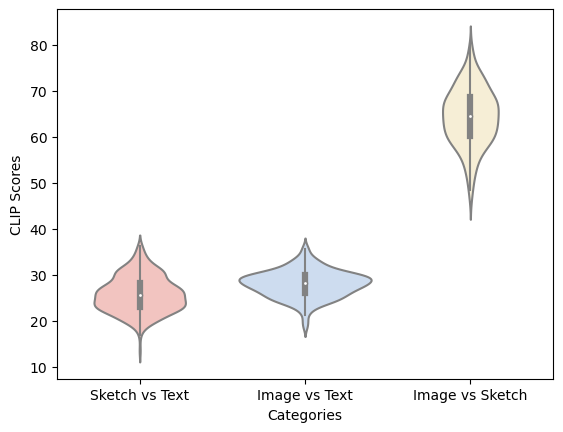

In [61]:
df = pd.read_csv("clip_scores/clip_scores_final.csv")
ax = seaborn.violinplot(df, inner="box", palette=['#FBBDB7', '#C7DBF5', '#FBF1D1'])
ax.set(xlabel='Categories', ylabel='CLIP Scores')
pal = seaborn.color_palette('Reds', 5)
pal.as_hex()
plt.show()

In [62]:
df.mean()

/tmp/ipykernel_11202/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Sketch vs Text     25.878231
Image vs Text      28.099238
Image vs Sketch    64.403957
dtype: float64

In [72]:
df = pd.read_csv("clip_scores/pairwise_clip.csv")
arr = df["CLIP"].to_numpy()
p_50 = np.percentile(arr, 50)
p_25 = np.percentile(arr, 25)
p_75 = np.percentile(arr, 75)

In [73]:
p_25, p_50, p_75
quantiles = [5, 25, 50, 75, 95]

In [85]:

colors = ['y','r', 'g', 'b', '#F72585']

(0.0, 190.0)

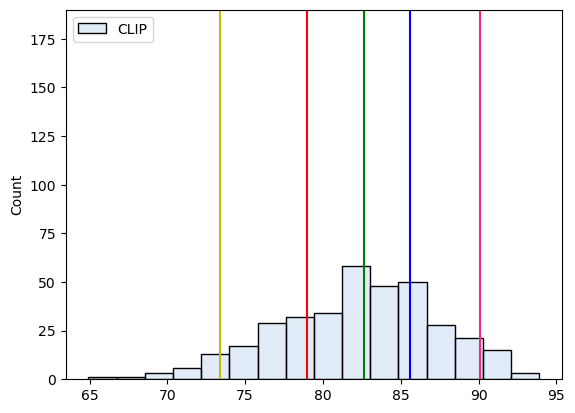

In [88]:
ax = seaborn.histplot(data=df, palette=['#C7DBF5'])
quantiles = [5, 25, 50, 75, 95]
for i in range(len(quantiles)):
    ax.axvline(np.percentile(arr, quantiles[i]), color=colors[i])
    
ax.set_ylim(top=190)

In [89]:

for q in quantiles:
    print(q,":", np.percentile(arr, q))
    print (df.loc[df['CLIP'] == np.percentile(arr, q)], "\n")

5 : 73.38623046875
Empty DataFrame
Columns: [Id, CLIP]
Index: [] 

25 : 78.9469401041667
            Id      CLIP
260   Page-603  78.94694
277  Page-1038  78.94694 

50 : 82.6578776041667
           Id       CLIP
117  Page-577  82.657878 

75 : 85.5997721354167
Empty DataFrame
Columns: [Id, CLIP]
Index: [] 

95 : 90.12207031249996
Empty DataFrame
Columns: [Id, CLIP]
Index: [] 



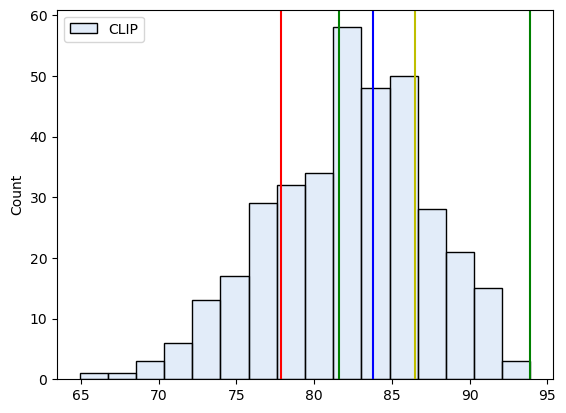

In [58]:
quantiles = [20, 40, 60, 80, 100]
colors = ['r', 'g', 'b', 'y', 'g']
ax = seaborn.histplot(data=df, palette=['#C7DBF5'])
for i in range(len(quantiles)):
    ax.axvline(np.percentile(arr, quantiles[i]), color=colors[i])
plt.show()